Dataset 1: Breast Cancer Dataset

Basic Data Exploratory Analysis

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [ ]:
df = pd.read_csv('/content/Breast_cancer_data.csv')
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


Implies that there are no null values to be dropped from the dataset.

In [ ]:
df.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,1.000000


In [ ]:
df_corr = df.corr()
df_corr

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
mean_radius,1.000000,0.323782,0.997855,0.987357,0.170581,-0.730029
mean_texture,0.323782,1.000000,0.329533,0.321086,-0.023389,-0.415185
mean_perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,-0.742636
mean_area,0.987357,0.321086,0.986507,1.000000,0.177028,-0.708984
mean_smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,-0.358560
diagnosis,-0.730029,-0.415185,-0.742636,-0.708984,-0.358560,1.000000


<Axes: >

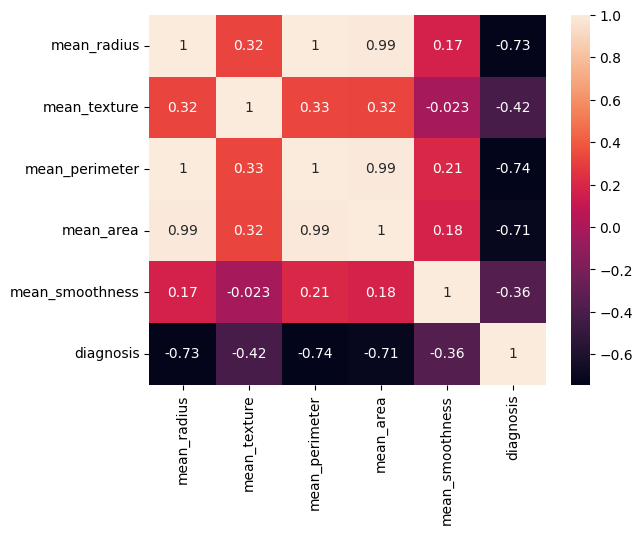

In [ ]:
sns.heatmap(df_corr,annot=True)

Gives us the correlation between attributes.
Dropping attributes with higher correlation helps to reduce the mutual influence these attributes have on each other thus giving us a more accurate and less influenced data.

In [ ]:
df = df.drop(['mean_perimeter', 'mean_area'], axis=1)
df.head()

,mean_radius,mean_texture,mean_smoothness,diagnosis
0,17.99,10.38,0.11840,0
1,20.57,17.77,0.08474,0
2,19.69,21.25,0.10960,0
3,11.42,20.38,0.14250,0
4,20.29,14.34,0.10030,0


Dropping paramters with correlation almost equal to one since one feature affects the behaviour of the other it is highly correlated with despite there being no changes in the latter feature affecting the data.

<Axes: >

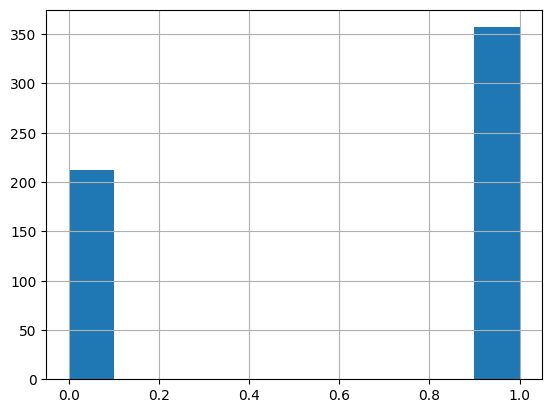

In [ ]:
df['diagnosis'].hist()

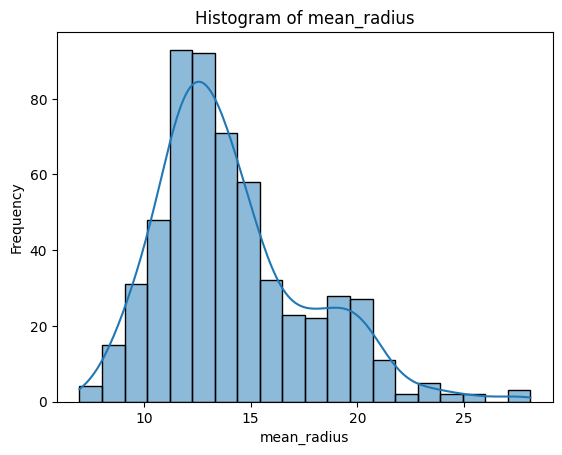

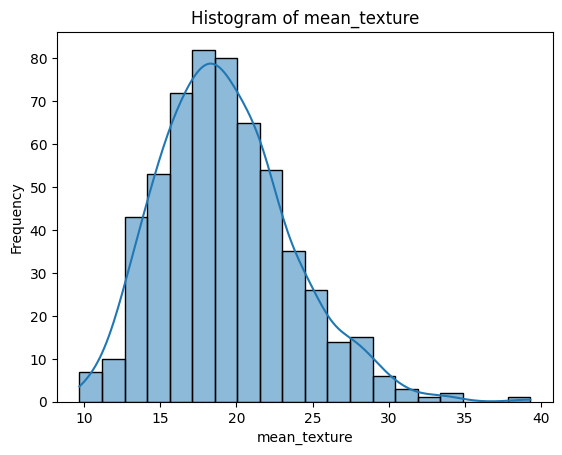

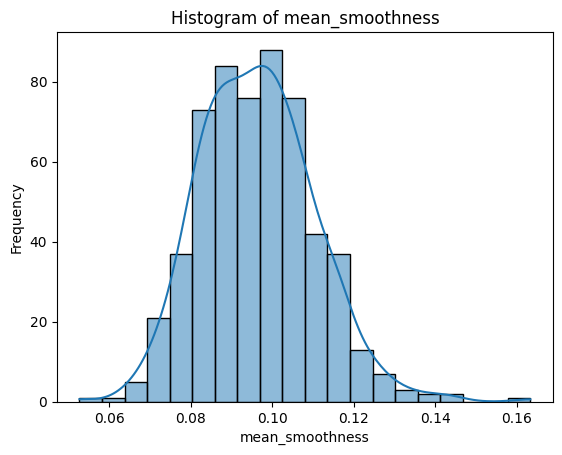

In [ ]:
selected_features = ['mean_radius', 'mean_texture', 'mean_smoothness']
for feature in selected_features:
    sns.histplot(df[feature],kde=True, bins=20, alpha=0.5)
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {feature}')
    plt.show()

Calculate P(Y=y) for all possible y:

In [ ]:
import pandas as pd
def prior_probabilty(df,y):
  prior_prob = {}
  for diagnosis in df[y].unique():
    prior_prob[diagnosis] = len(df[df[y]==diagnosis])/ len(df)
  print(f"Prior Probability is: {prior_prob}")

y = 'diagnosis'
prior_probabilty(df,y)

Prior Probability is: {0: 0.37258347978910367, 1: 0.6274165202108963}


In [ ]:
for keys in df.keys()[:-1]:
  mean = df[keys].mean()
  std = df[keys].std()
  print (mean,std)

14.127291739894552 3.5240488262120775
19.289648506151142 4.301035768166949
0.0963602811950791 0.01406412813767362


Calculation of the likelihood of the attribute for the hypothesis.

In [ ]:
def calculate_likelihood(df, feat_name, feat_val, Y, label):
    feat = list(df.columns)
    df = df[df[Y]==label]
    mean, std = df[feat_name].mean(), df[feat_name].std()
    p_x_given_y = (1 / (np.sqrt(2 * np.pi) * std)) *  np.exp(-((feat_val-mean)**2 / (2 * std**2 )))
    return p_x_given_y

Defining the function for the Naive-Bayes Model.

In [ ]:
def naive_bayes_gaussian(df, X, Y):
    features = list(df.columns)[:-1]
    prior = prior_probabilty(df, Y)

    Y_pred = []
    for x in X:
        labels = sorted(list(df[Y].unique()))
        likelihood = [1]*len(labels)
        for j in range(len(labels)):
            for i in range(len(features)):
                likelihood[j] *= calculate_likelihood(df, features[i], x[i], Y, labels[j])

        post_prob = [1]*len(labels)
        for j in range(len(labels)):
            post_prob[j] = likelihood[j] * prior[j]

        Y_pred.append(np.argmax(post_prob))

    return np.array(Y_pred)

Fitting the model into the SKlearn Guassian function.

In [ ]:
# from sklearn.model_selection import train_test_split
# train, test =train_test_split(df , test_size =.2, random_state = 41)
# X_test = test.iloc[:,:-1].values
# Y_test = test.iloc[:,-1].values
# Y_pred = naive_bayes_gaussian(df,X=X_test,Y="diagnosis")
# from sklearn.metrics import confusion_matrix, f1_score
# print(confusion_matrix(Y_test,Y_pred))
# print(f1_score(Y_test,Y_pred))

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, f1_score
train, test = train_test_split(df, test_size=.2, random_state=41)
X_test = test.iloc[:, :-1].values
Y_test = test.iloc[:, -1].values
gnb = GaussianNB()
gnb.fit(train.iloc[:, :-1].values, train.iloc[:, -1].values)
Y_pred = gnb.predict(X_test)

print(confusion_matrix(Y_test, Y_pred))
print(f1_score(Y_test, Y_pred))

[[36  4]
 [ 0 74]]
0.9736842105263158


The count of the  False-Negative and the False-Positive is almost negligible compared to the True-Negative and the True-Positive thus indicating a higher accuracy of the prediction of the model.

In [ ]:
df.isnull().sum()

mean_radius        0
mean_texture       0
mean_smoothness    0
diagnosis          0
dtype: int64

Dataset 2: Social Network Dataset

In [ ]:
df1  = pd.read_csv('/content/Social_Network_Ads.csv')
X = df1.iloc[:,[1,2,3]].values
y = df1.iloc[:,-1].values

FileNotFoundError: [Errno 2] No such file or directory: '/content/Social_Network_Ads.csv'

In [ ]:
df1.head()

In [ ]:
X

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:,0] = le.fit_transform(X[:,0])

Label Encoding (Converting) attributes with binary string labels to 0s and 1s for easier interpretation.

In [ ]:
X

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=15)

Feature Scaling



In [ ]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X_train

Fittng into Guassian Model.

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, f1_score
confusion_matrix = confusion_matrix(y_test,y_pred)
accuracy = f1_score(y_test,y_pred)
print(f"Confusion Matrix:{confusion_matrix}")
print(f" Accuracy:{accuracy}")

The count of the False-Negative and the False-Positive is very less compared to the True-Negative and the True-Positive thus indicating a higher accuracy of the prediction of the model.

Dataset 3:German Credit Card Dataset

In [ ]:
import pandas as pd
df2  = pd.read_csv('/content/german_credit_data.csv')
df2.head()

In [ ]:
df2.isna().sum()

Dropping null values in the dataset.

In [ ]:
df2.info()

In [ ]:
df2 = df2.drop(['Saving accounts','Checking account'], axis =1)

In [ ]:
df2.head()

In [ ]:
X1 = df2.iloc[:,[1,2,3,4,5,6]].values
y1 = df2.iloc[:,-1].values

In [ ]:
y1

In [ ]:
y1 = le.fit_transform(y1)

In [ ]:
y1

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X1[:,1] = le.fit_transform(X1[:,1])
X1[:,3] = le.fit_transform(X1[:,3])

In [ ]:
X1

Label Encoding (Converting) attributes with binary string labels to 0s and 1s for easier interpretation.

In [ ]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1, test_size=0.20, random_state=21)

Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X1_train = sc.fit_transform(X1_train)
X1_test = sc.transform(X1_test)

In [ ]:
X1_train

Fitting a Guassian Model.

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X1_train, y1_train)

In [ ]:
y1_pred = classifier.predict(X1_test)

In [ ]:
from sklearn.metrics import confusion_matrix, f1_score
confusion_matrix1 = confusion_matrix(y1_test,y1_pred)
accuracy1 = f1_score(y1_test,y1_pred)
print(f"Confusion Matrix:{confusion_matrix1}")
print(f" Accuracy:{accuracy1}")

The count of the False-Negative and the False-Positive is less compared to the True-Negative and the True-Positive thus indicating a higher accuracy of the prediction of the model.